<a href="https://colab.research.google.com/github/hakmin1015/PowerSystemEconomics/blob/main/Data_Analysis/Exogeneous_Variable_Analysis/ptemplevel_power_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 체감온도 구간과 전력수요의 상관관계 분석

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/LoadForecasting/전력과 온도의 상관관계 분석


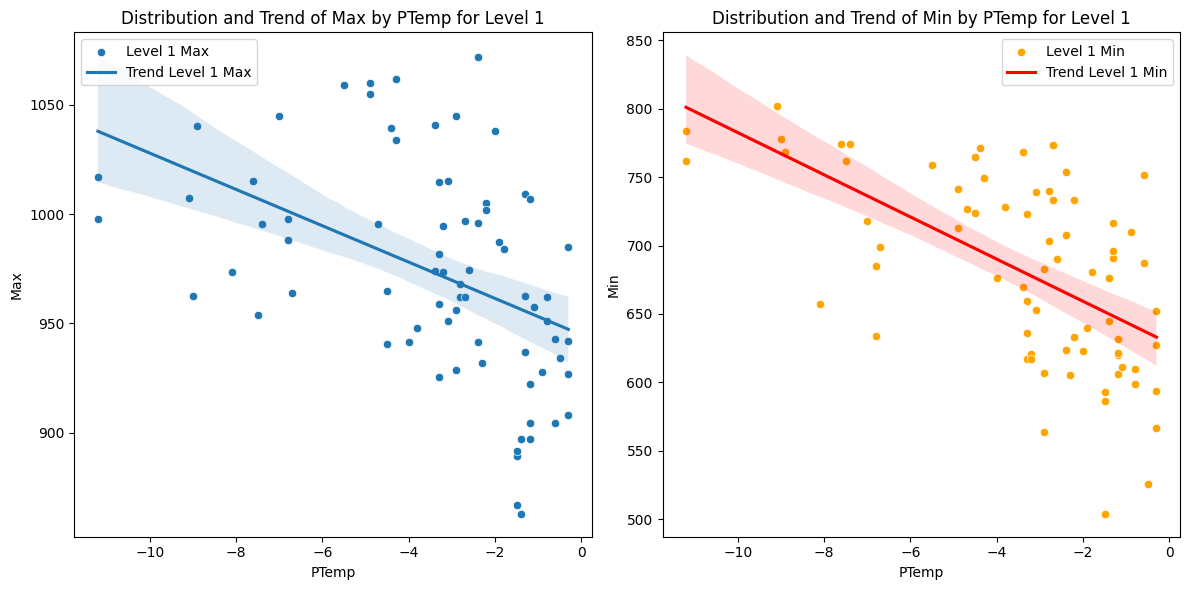

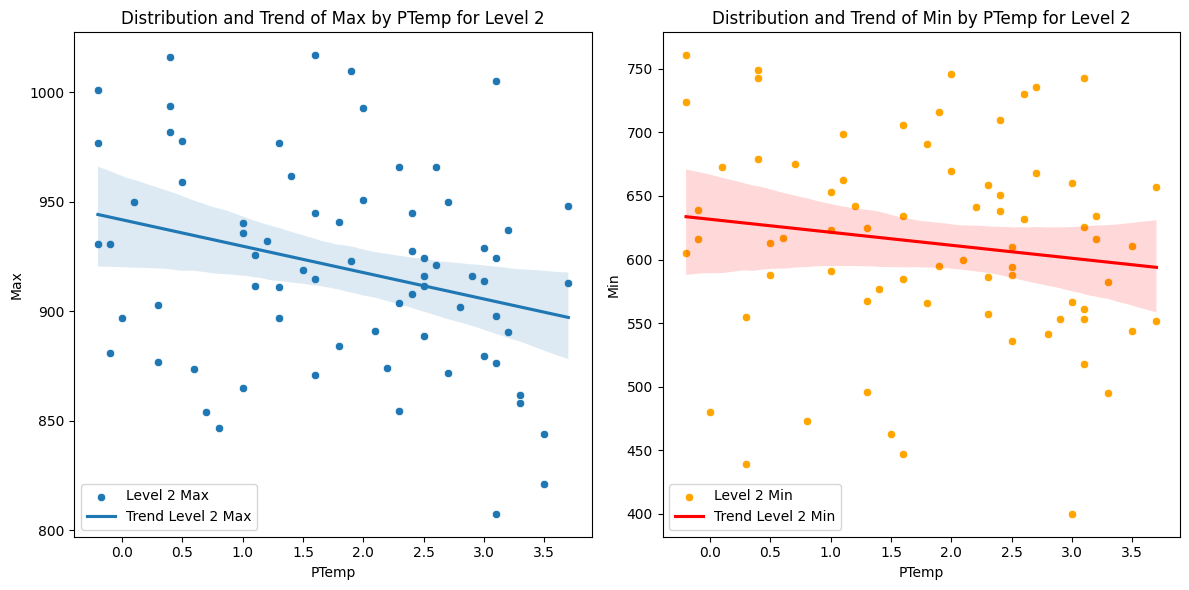

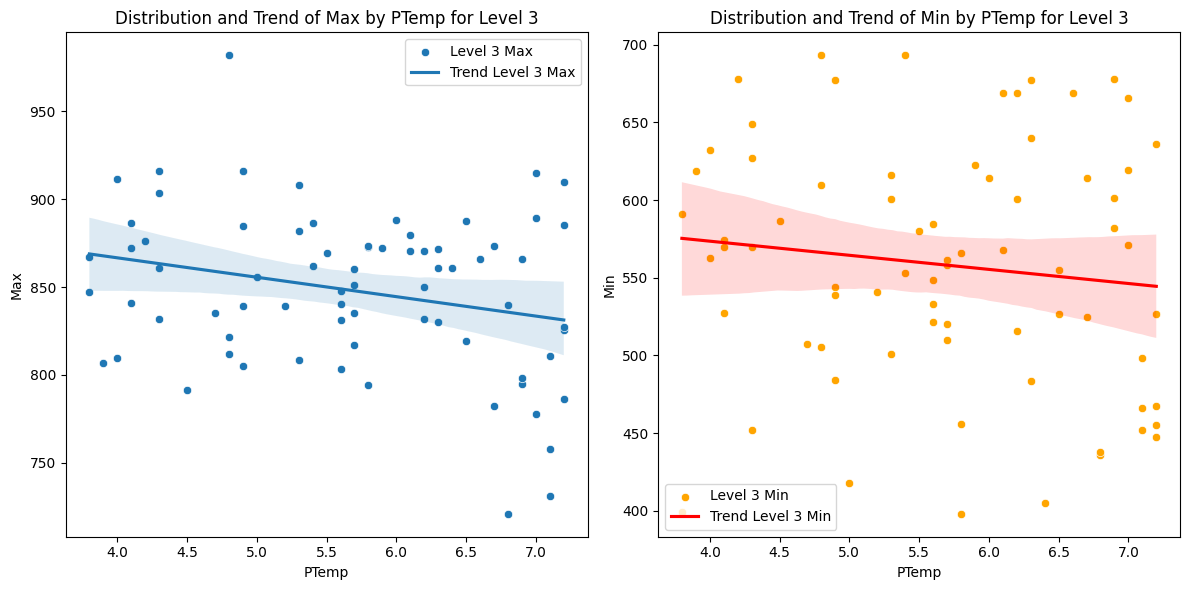

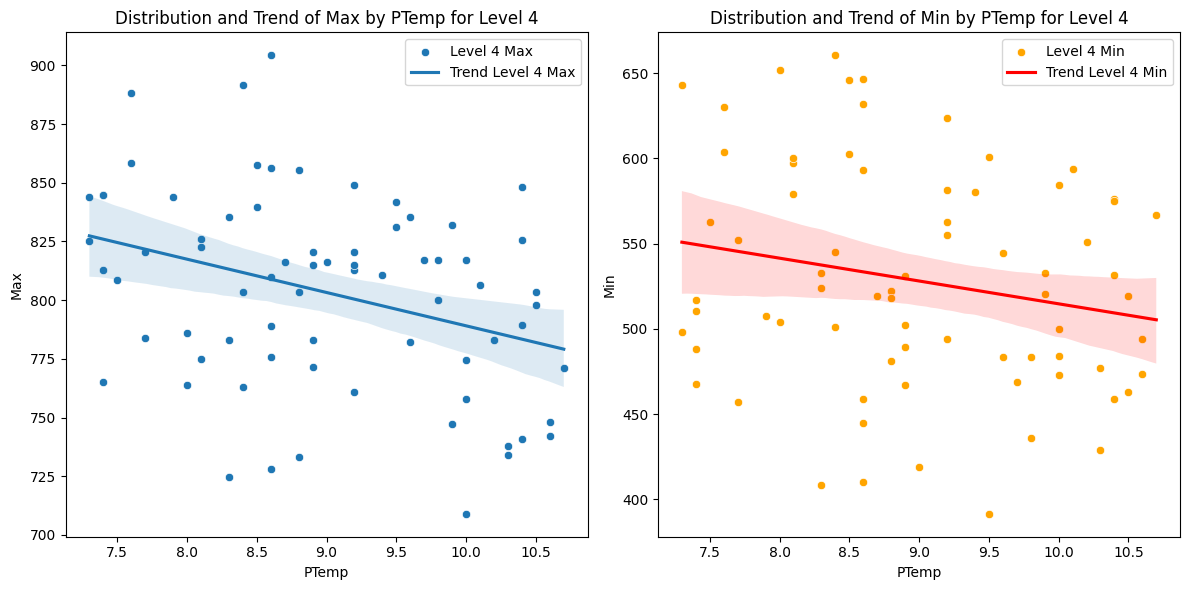

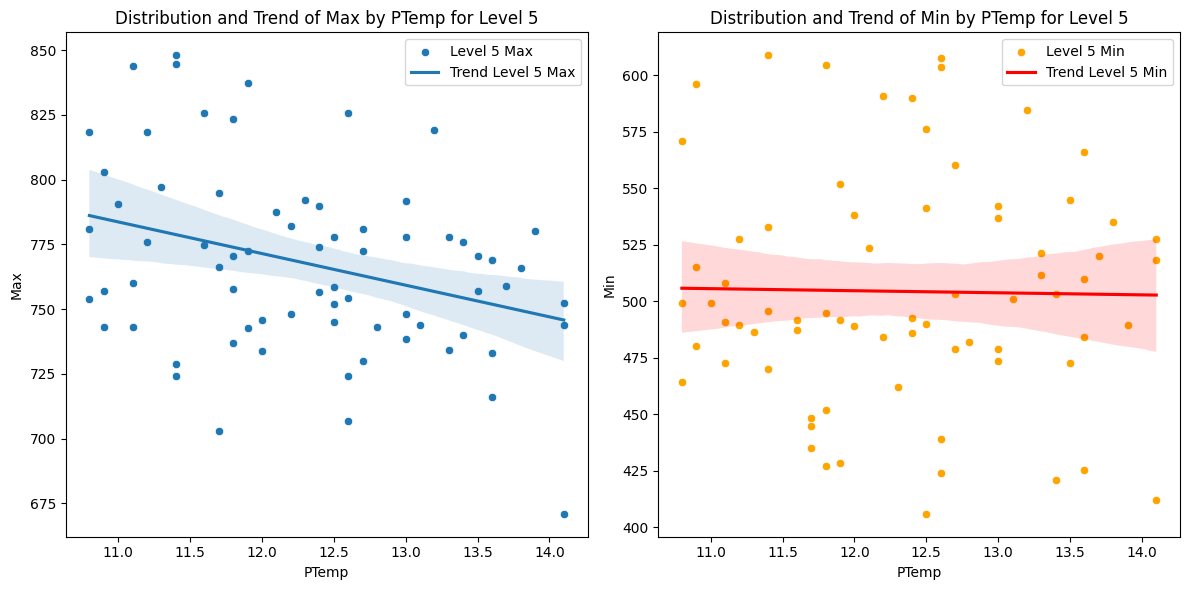

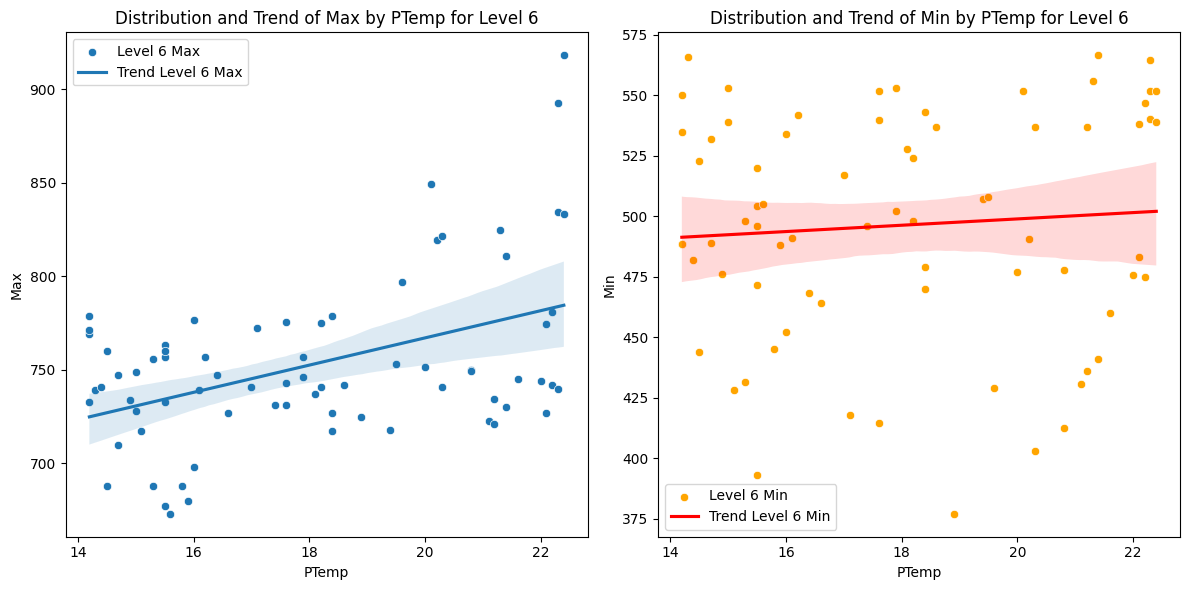

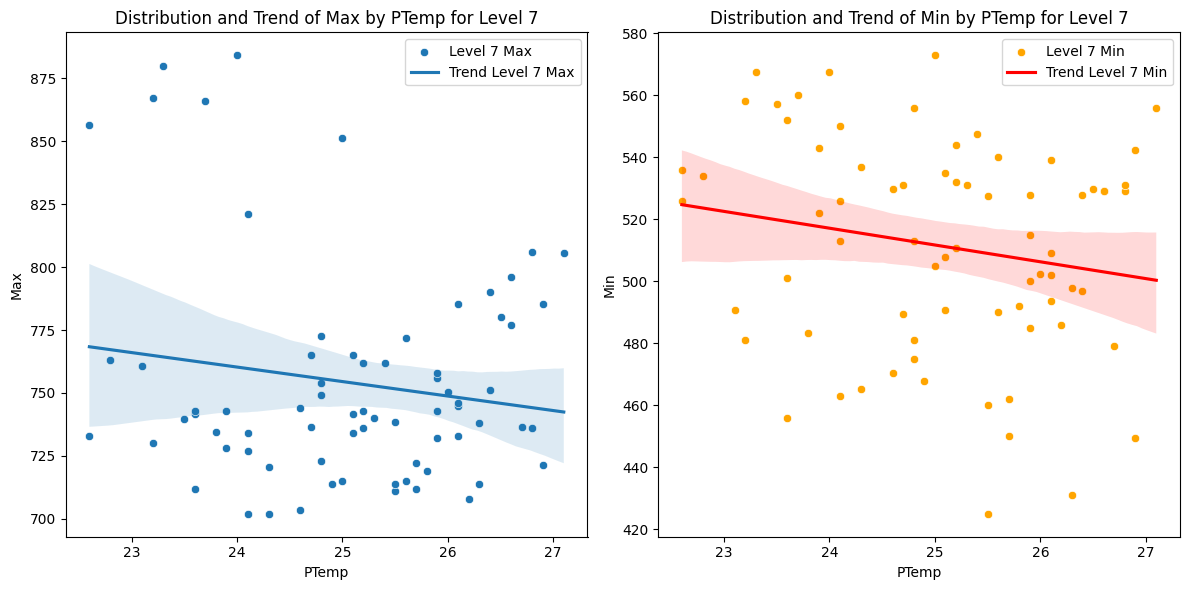

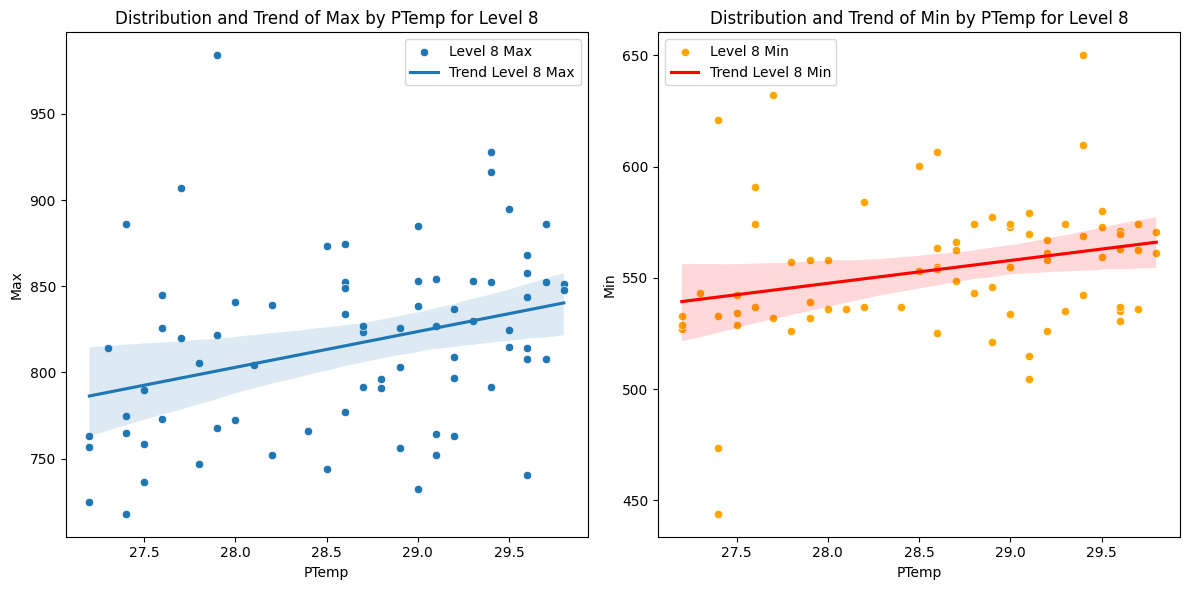

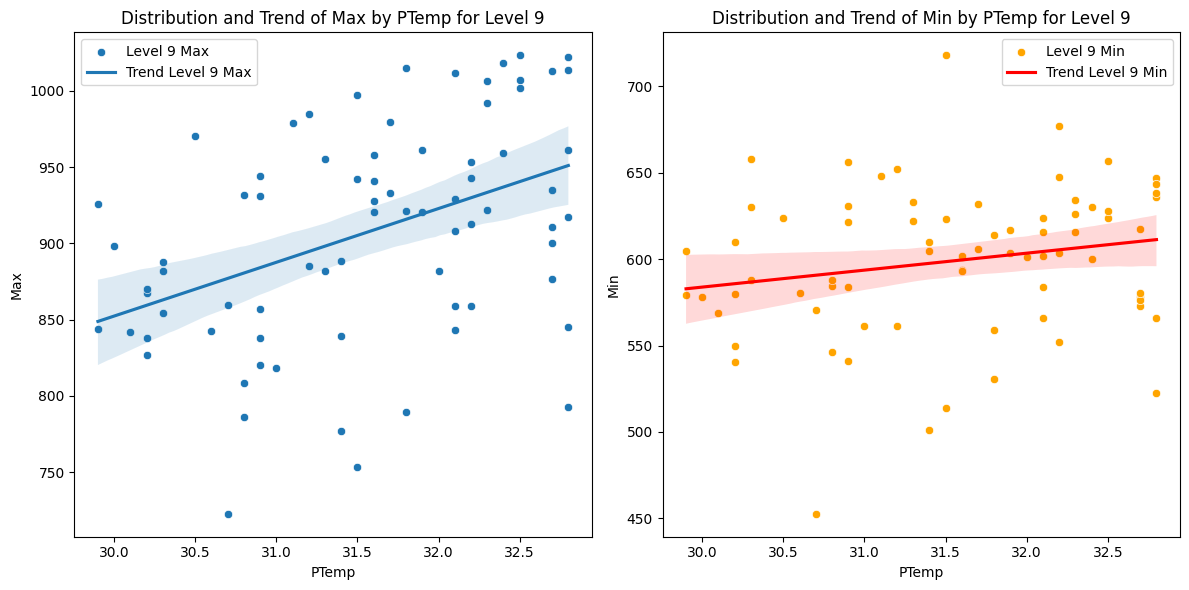

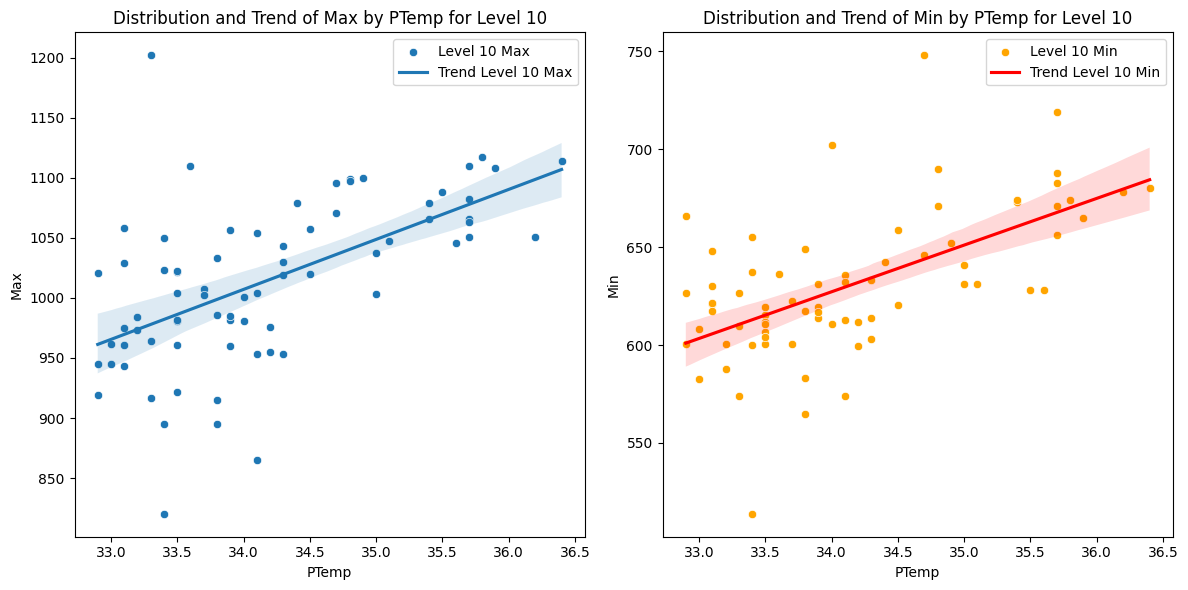

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/LoadForecasting/전력과 온도의 상관관계 분석/

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 엑셀 파일 읽기 (파일 경로를 'ptemp_power.xlsx'로 대체)
df = pd.read_excel('ptemp_power.xlsx')

# ptemp에 따라 정렬
df = df.sort_values(by='ptemp')

# level이 1~10인 경우만 각각의 그래프를 그리기
for level in range(1, 11):
    subset = df[df['level'] == level]

    if subset.empty:
        continue  # 해당 level에 데이터가 없으면 건너뛰기

    # 그래프 그리기
    plt.figure(figsize=(12, 6))

    # Max 그래프 그리기
    plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 subplot
    sns.scatterplot(data=subset, x='ptemp', y='max', label=f'Level {level} Max')
    sns.regplot(data=subset, x='ptemp', y='max', scatter=False, label=f'Trend Level {level} Max')
    plt.title(f'Distribution and Trend of Max by PTemp for Level {level}')
    plt.xlabel('PTemp')
    plt.ylabel('Max')
    plt.legend()

    # Min 그래프 그리기
    plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 subplot
    sns.scatterplot(data=subset, x='ptemp', y='min', label=f'Level {level} Min', color='orange')
    sns.regplot(data=subset, x='ptemp', y='min', scatter=False, label=f'Trend Level {level} Min', color='red')
    plt.title(f'Distribution and Trend of Min by PTemp for Level {level}')
    plt.xlabel('PTemp')
    plt.ylabel('Min')
    plt.legend()

    plt.tight_layout()  # subplot간의 간격 조정
    plt.show()
